In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.simplefilter('ignore')

ModuleNotFoundError: No module named 'seaborn'

   gender  age_group  country          product_name        category  quantity  \
0  Female  Teenagers   Canada        Fitbit Versa 3     Electronics         3   
1    Male     Adults    China          Levi's Jeans         Apparel         4   
2    Male     Senior  Germany    Lego Star Wars Set            Toys         2   
3    Male  Teenagers   France          Dyson Vacuum  Home & Kitchen         4   
4  Female  Teenagers   Brazil  Adidas Running Shoes         Apparel         1   

   unit_price order_status    payment_method review_text  
0         229      Pending       Credit Card        good  
1          59      Pending            PayPal     average  
2          59    Delivered  Cash on Delivery        good  
3         399    Delivered  Cash on Delivery   very good  
4         110     Returned  Cash on Delivery   very good  
(10000, 10)


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['Pending', 'Pending', 'Delivered', ..., 'Returned', 'Cancelled',
       'Pending'], shape=(10000,), dtype=object)

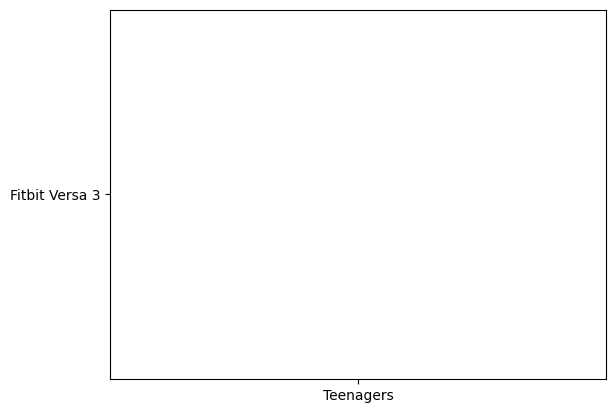

In [2]:
# Laden des Iris-Datensatzes
#iris = datasets.load_breast_cancer()
#iris = datasets.load_iris()
#x = iris.data
#y = iris.target
from pathlib import Path
import pandas as pd
from pathlib import Path
import pandas as pd

# Pfad relativ zum Projektordner (DSAI-FSM-7ABIF)
csv_path = Path("Data/ecommerce_dataset_10000.csv")

# CSV laden
df = pd.read_csv(csv_path)

# Ausgabe zur Kontrolle
print(df.head())
print(df.shape)
x = df.drop("order_status", axis=1).values  # Alle Spalten außer der Zielspalte
y = df["order_status"].values

a = 1
b = 3
xs=x[:,a]
ys=x[:,b]

plt.scatter(xs,ys,c=y)
plt.show()

# Aufteilen des Datensatzes in Trainings- und Testdaten
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [9]:
# Initialisierung des Naive Bayes Klassifizierers
from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors=3)

classifier = GaussianNB()

# Trainieren des Klassifizierers mit Trainingsdaten
classifier.fit(x_train, y_train)

# Vorhersage der Klassen für Testdaten
y_pred = classifier.predict(x_test)

In [25]:
# Auswertung der Vorhersagegenauigkeit
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Genauigkeit des Klassifizierers:", accuracy)

Genauigkeit des Klassifizierers: 0.9777777777777777


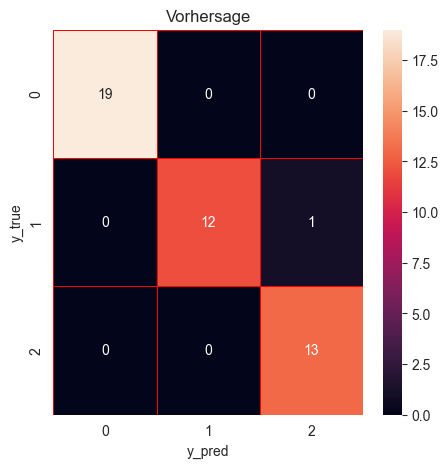

In [28]:
y_true = y_test
confmatrix = confusion_matrix(y_true,y_pred)
f, ax =  plt.subplots(figsize=(5,5))
sns.heatmap(confmatrix, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('Vorhersage')
plt.show()

In [17]:
samples=iris.data

model=KMeans(n_clusters=3)
model.fit(samples)
labels=model.predict(samples)
print("gefundene Cluster")
print(labels)
print("Echte Zuordnung")
print(y)
# Iris
y_labels = np.choose(labels, [1, 0, 2]).astype(int)

print("umkodierte Cluster-Labels")
print(y_labels)


gefundene Cluster
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Echte Zuordnung
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
umkodierte Cluster-Labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


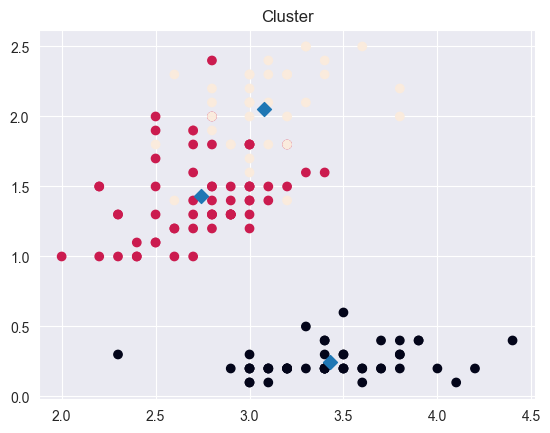

In [18]:
xs=samples[:,a]
ys=samples[:,b]
plt.scatter(xs,ys,c=y_labels)
centroids=model.cluster_centers_
centroids_x=centroids[:,a]
centroids_y=centroids[:,b]
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.title('Cluster')
plt.show()

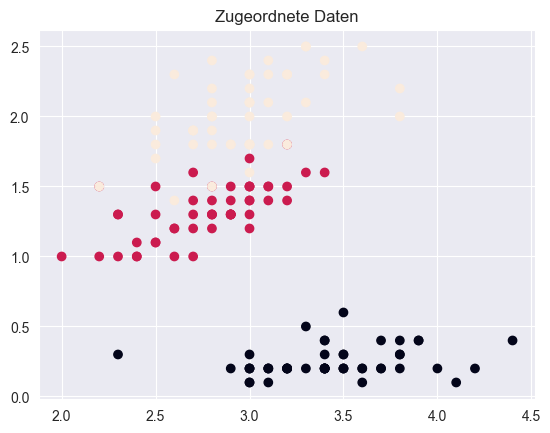

In [19]:
xs=x[:,a]
ys=x[:,b]
plt.scatter(xs,ys,c=y)
plt.title('Zugeordnete Daten')
plt.show()

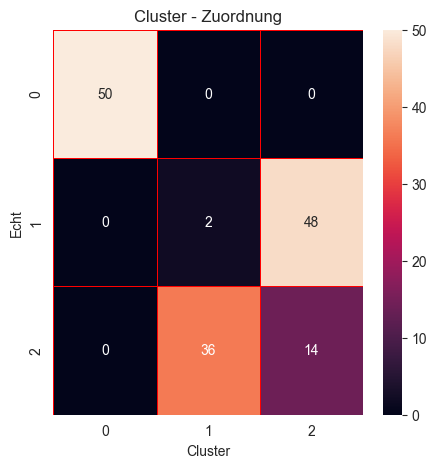

Genauigkeit des Clusters: 0.44


In [12]:
confmatrix = confusion_matrix(y,y_labels)
f, ax =  plt.subplots(figsize=(5,5))
sns.heatmap(confmatrix, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('Cluster')
plt.ylabel('Echt')
plt.title('Cluster - Zuordnung')
plt.show()
accuracy = metrics.accuracy_score(y, y_labels)
print("Genauigkeit des Clusters:", accuracy)
